In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# READING DATASET

In [3]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# DATA PREPROCESSING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
if df['N'].all()>90:
    print(df['N'])

In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
x = df.drop('label', axis = 1)
y = df['label']

# DATA VISUALIZATION

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
print(df.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


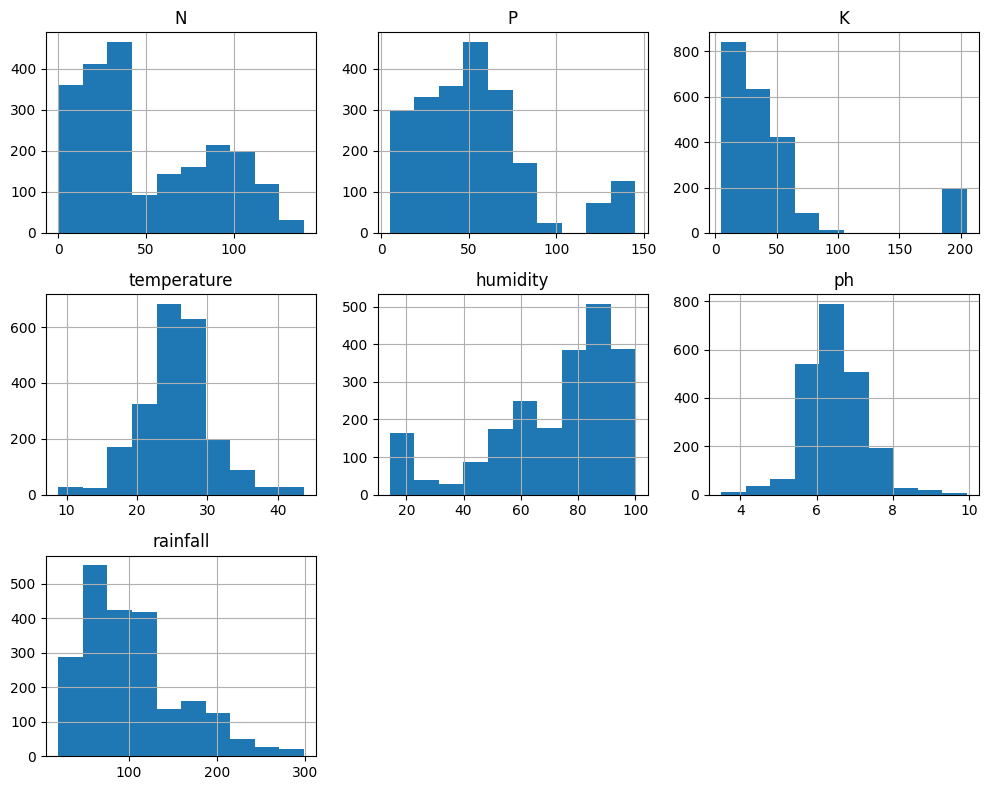

In [10]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


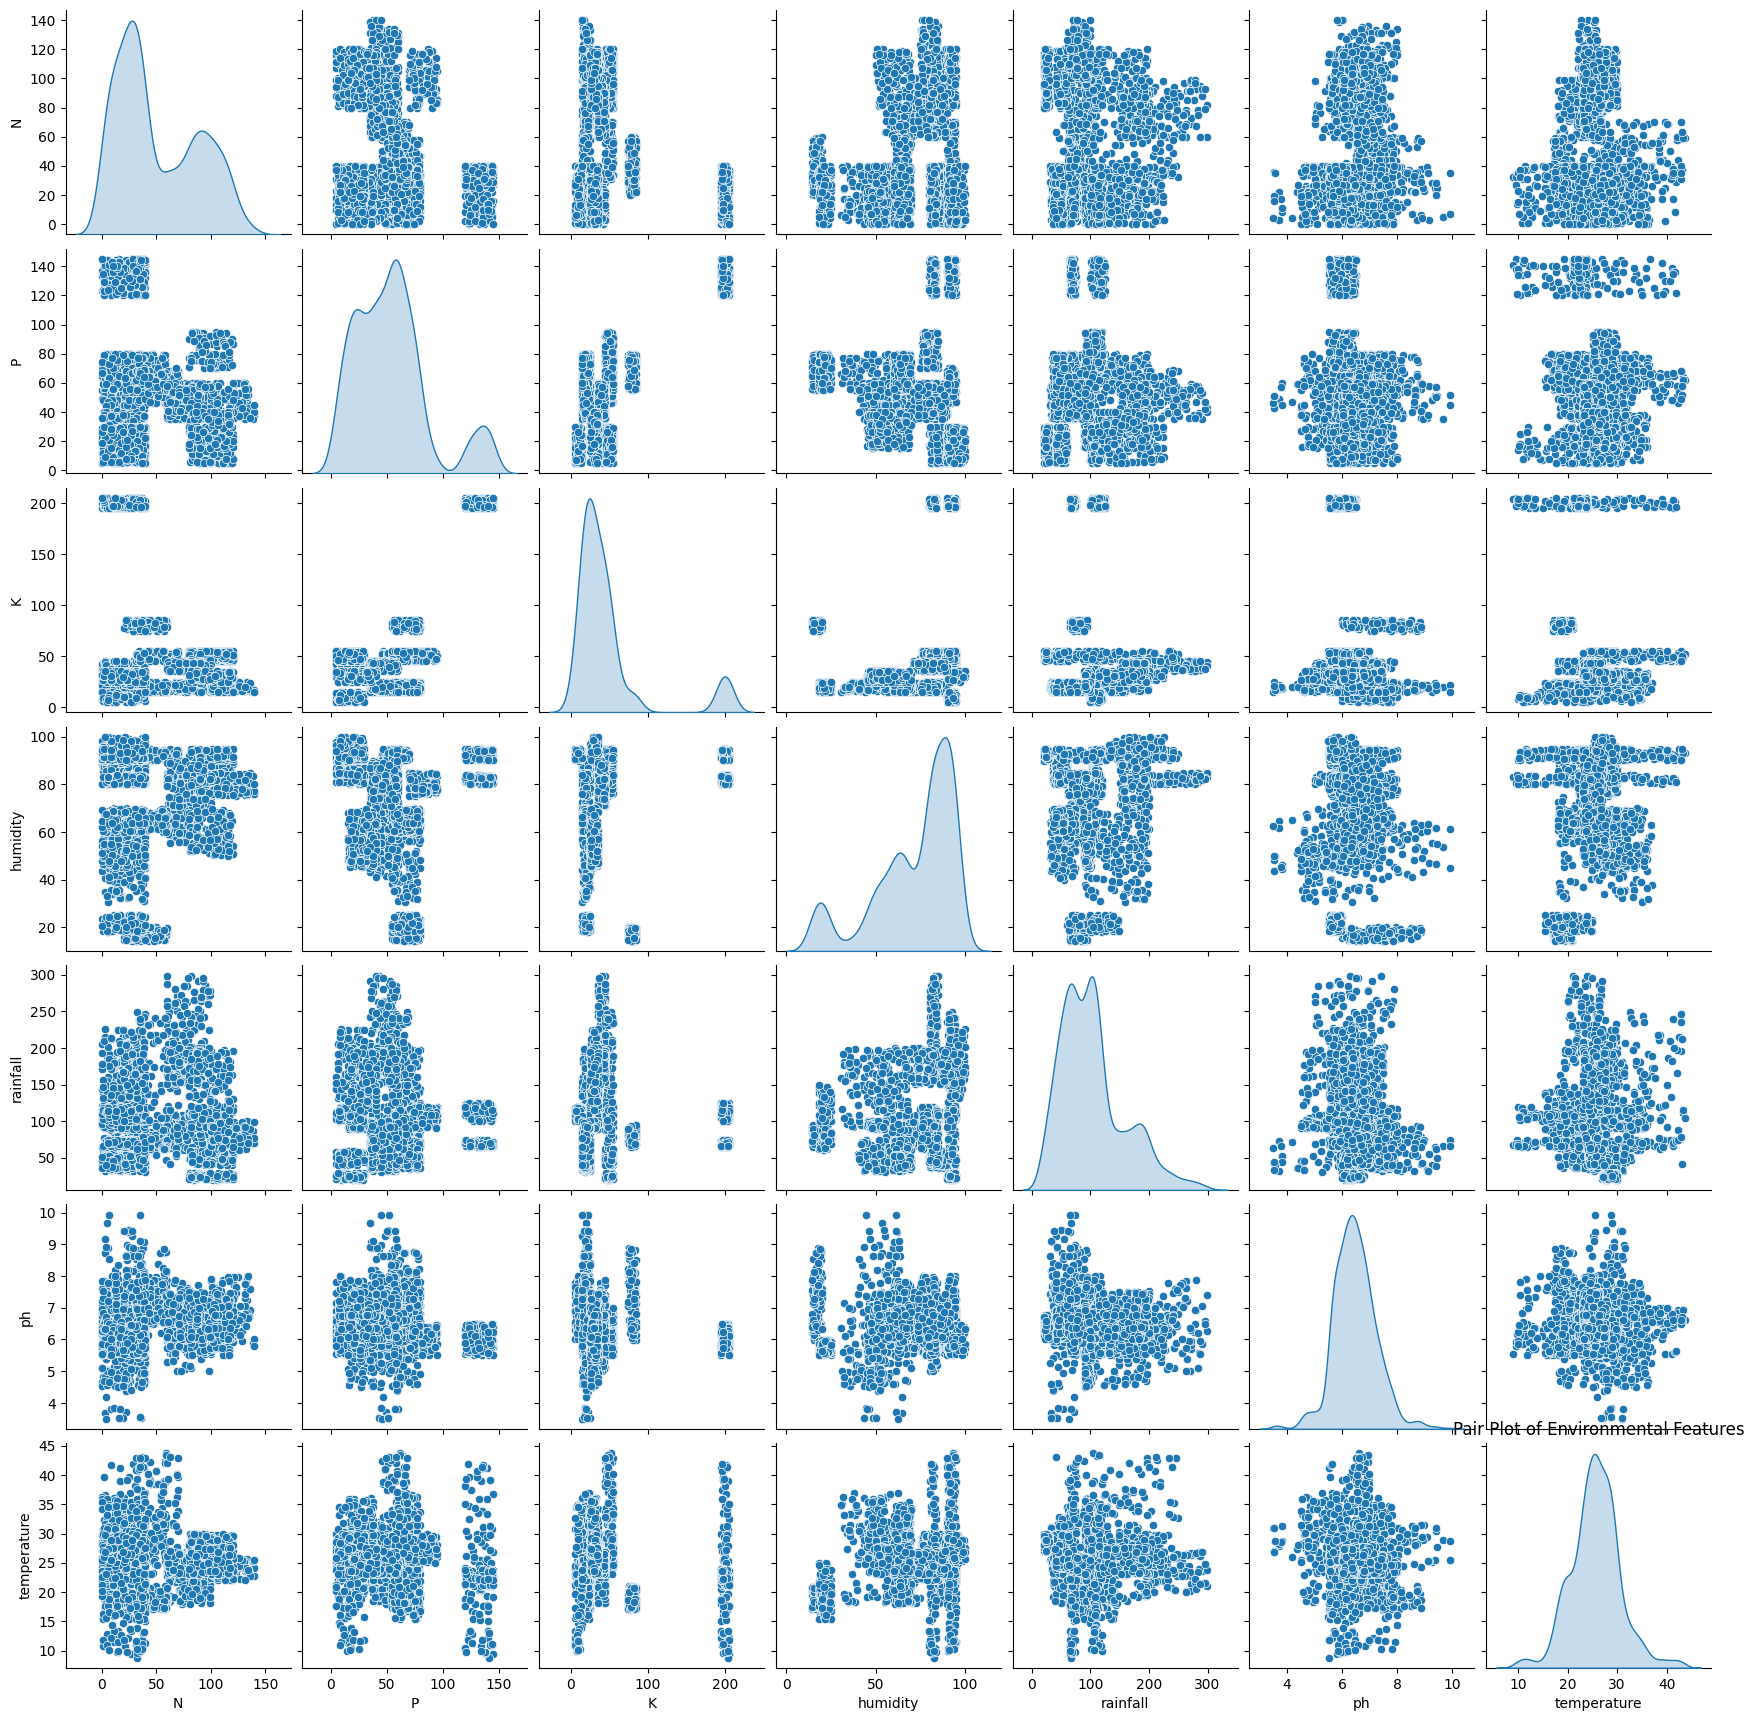

In [11]:
sns.pairplot(df[['N', 'P', 'K', 'humidity', 'rainfall', 'ph', 'temperature']], diag_kind='kde')
plt.title('Pair Plot of Environmental Features')
plt.show()

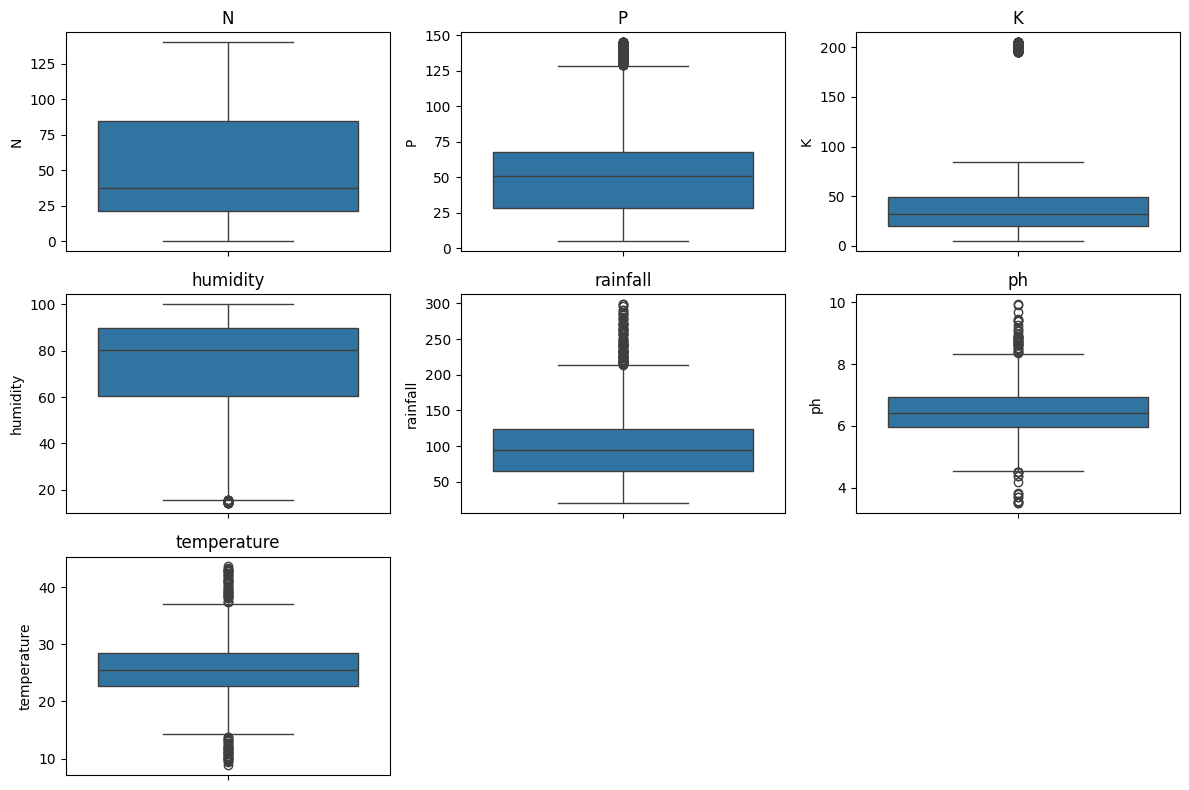

In [12]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(['N', 'P', 'K', 'humidity', 'rainfall', 'ph', 'temperature']):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

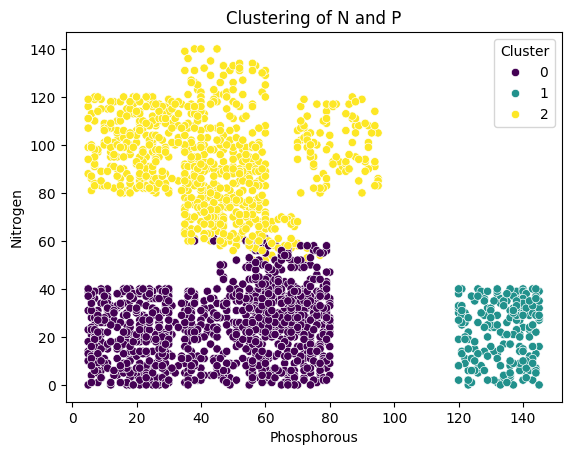

In [13]:
from sklearn.cluster import KMeans

# Example: Clustering based on N, P, K nutrients
X = df[['N', 'P', 'K']]

# Scale the data if necessary
# X_scaled = StandardScaler().fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
sns.scatterplot(x='P', y='N', hue='Cluster', data=df, palette='viridis')
plt.title('Clustering of N and P')
plt.xlabel('Phosphorous')
plt.ylabel('Nitrogen')
plt.show()

# FEATURE ENGINEERING

In [14]:
# Adding a new feature for NPK ratio
df['NPK_ratio'] = df['N'] / (df['P'] + df['K'] + 1)  # Avoiding division by zero

# Interaction Term: Temperature-Humidity Index
df['Temp_Humidity_Index'] = df['temperature'] * df['humidity']

# Display the new features
print(df[['N', 'P', 'K', 'NPK_ratio', 'temperature', 'humidity', 'Temp_Humidity_Index']].head())


    N   P   K  NPK_ratio  temperature   humidity  Temp_Humidity_Index
0  90  42  43   1.046512    20.879744  82.002744          1712.196283
1  85  58  41   0.850000    21.770462  80.319644          1748.595734
2  60  55  44   0.600000    23.004459  82.320763          1893.744627
3  74  35  40   0.973684    26.491096  80.158363          2123.482908
4  78  42  42   0.917647    20.130175  81.604873          1642.720357


In [15]:
# Print the actual column names in the DataFrame
print("Columns in the DataFrame:", df.columns)
# Adjust the selected_features list based on actual column names
# This is an example, replace with the actual names you see from the previous print statement
selected_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'NPK_ratio', 'Temp_Humidity_Index']

# Extract features (X) and target (y) again
X = df[selected_features]
y = df['label']  # Assuming the target variable 


Columns in the DataFrame: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'Cluster', 'NPK_ratio', 'Temp_Humidity_Index'],
      dtype='object')


In [16]:
# Ensure these new features are added to your DataFrame
df['NPK_ratio'] = df['N'] / (df['P'] + df['K'] + 1)  # Avoiding division by zero
df['Temp_Humidity_Index'] = df['temperature'] * df['humidity']


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Alternatively, Normalization (choose one based on your needs)
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X)

# Display the first few rows of the scaled data
print(pd.DataFrame(X_standardized, columns=selected_features).head())
print(pd.DataFrame(X_normalized, columns=selected_features).head())


          N         P         K  temperature  humidity        ph  rainfall  \
0  1.068797 -0.344551 -0.101688    -0.935587  0.472666  0.043302  1.810361   
1  0.933329  0.140616 -0.141185    -0.759646  0.397051  0.734873  2.242058   
2  0.255986  0.049647 -0.081939    -0.515898  0.486954  1.771510  2.921066   
3  0.635298 -0.556811 -0.160933     0.172807  0.389805  0.660308  2.537048   
4  0.743673 -0.344551 -0.121436    -1.083647  0.454792  1.497868  2.898373   

   NPK_ratio  Temp_Humidity_Index  
0   0.663769            -0.203138  
1   0.317840            -0.151079  
2  -0.122248             0.056511  
3   0.535568             0.385081  
4   0.436923            -0.302501  
          N         P      K  temperature  humidity        ph  rainfall  \
0  0.642857  0.264286  0.190     0.345886  0.790267  0.466264  0.656458   
1  0.607143  0.378571  0.180     0.371445  0.770633  0.549480  0.741675   
2  0.428571  0.357143  0.195     0.406854  0.793977  0.674219  0.875710   
3  0.528571  0.

# DATA MODELING


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify = y, random_state = 1)

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

C:\python37\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred = model.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
logistic_acc = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression is " + str(logistic_acc))

Accuracy of logistic regression is 0.9618181818181818


In [22]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier(criterion='entropy',max_depth = 6, random_state = 2)
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)

In [23]:
decision_acc = accuracy_score(y_test, y_pred_2)
print("Accuracy of decision  tree is " + str(decision_acc))

Accuracy of decision  tree is 0.9781818181818182


In [24]:
from sklearn.naive_bayes import GaussianNB
model_3 = GaussianNB()
model_3.fit(x_train, y_train)
y_pred_3 = model_3.predict(x_test)

In [25]:
naive_bayes_acc = accuracy_score(y_test, y_pred_3)
print("Accuracy of naive_bayes is " + str(naive_bayes_acc))

Accuracy of naive_bayes is 0.9945454545454545


In [26]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Example data - replace with your actual data
# Assuming x_train, x_test, y_train, y_test are defined and contain the training and testing data

# Step 1: Train the RandomForestClassifier on the training data
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)  # Assuming x_train and y_train are numpy arrays or pandas DataFrame without feature names

# Step 2: Predict on the test data
# Ensure x_test is in the same format as x_train used during fitting
if isinstance(x_train, np.ndarray):
    x_test_for_pred = x_test if isinstance(x_test, np.ndarray) else x_test.values
else:
    x_test_for_pred = pd.DataFrame(x_test, columns=x_train.columns) if isinstance(x_test, np.ndarray) else x_test

y_pred_rf = rf_model.predict(x_test_for_pred)

# Step 3: Calculate and print the accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest is " + str(rf_accuracy))


Accuracy of Random Forest is 0.9963636363636363


# MODEL EVALUATION

In [30]:
def print_evaluation_metrics(y_test, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.4f}")
    print("\n")

# Print evaluation metrics for each model
print_evaluation_metrics(y_test, y_pred, "Logistic Regression")
print_evaluation_metrics(y_test, y_pred_2, "Decision Tree")
print_evaluation_metrics(y_test, y_pred_3, "Naive Bayes")
print_evaluation_metrics(y_test, y_pred_rf, "Random Forest")

Evaluation Metrics for Logistic Regression:
Accuracy: 0.9618
Precision: 0.9628
Recall: 0.9618
F1 Score: 0.9619


Evaluation Metrics for Decision Tree:
Accuracy: 0.9782
Precision: 0.9792
Recall: 0.9782
F1 Score: 0.9779


Evaluation Metrics for Naive Bayes:
Accuracy: 0.9945
Precision: 0.9949
Recall: 0.9945
F1 Score: 0.9945


Evaluation Metrics for Random Forest:
Accuracy: 0.9964
Precision: 0.9966
Recall: 0.9964
F1 Score: 0.9964




In [35]:
def plot_roc_curve(models, x_test, y_test):
    plt.figure(figsize=(10, 6))
    for model, name in models:
        y_prob = model.predict_proba(x_test)
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=model.classes_[1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc="lower right")
    plt.show()

In [71]:

def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(18, 16))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.colorbar()
    tick_marks = np.arange(len(set(y_test)))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)

    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm_normalized.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, f"{cm[i, j]}\n({cm_normalized[i, j]:.2f})",
                 horizontalalignment="center",
                 color="white" if cm_normalized[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()



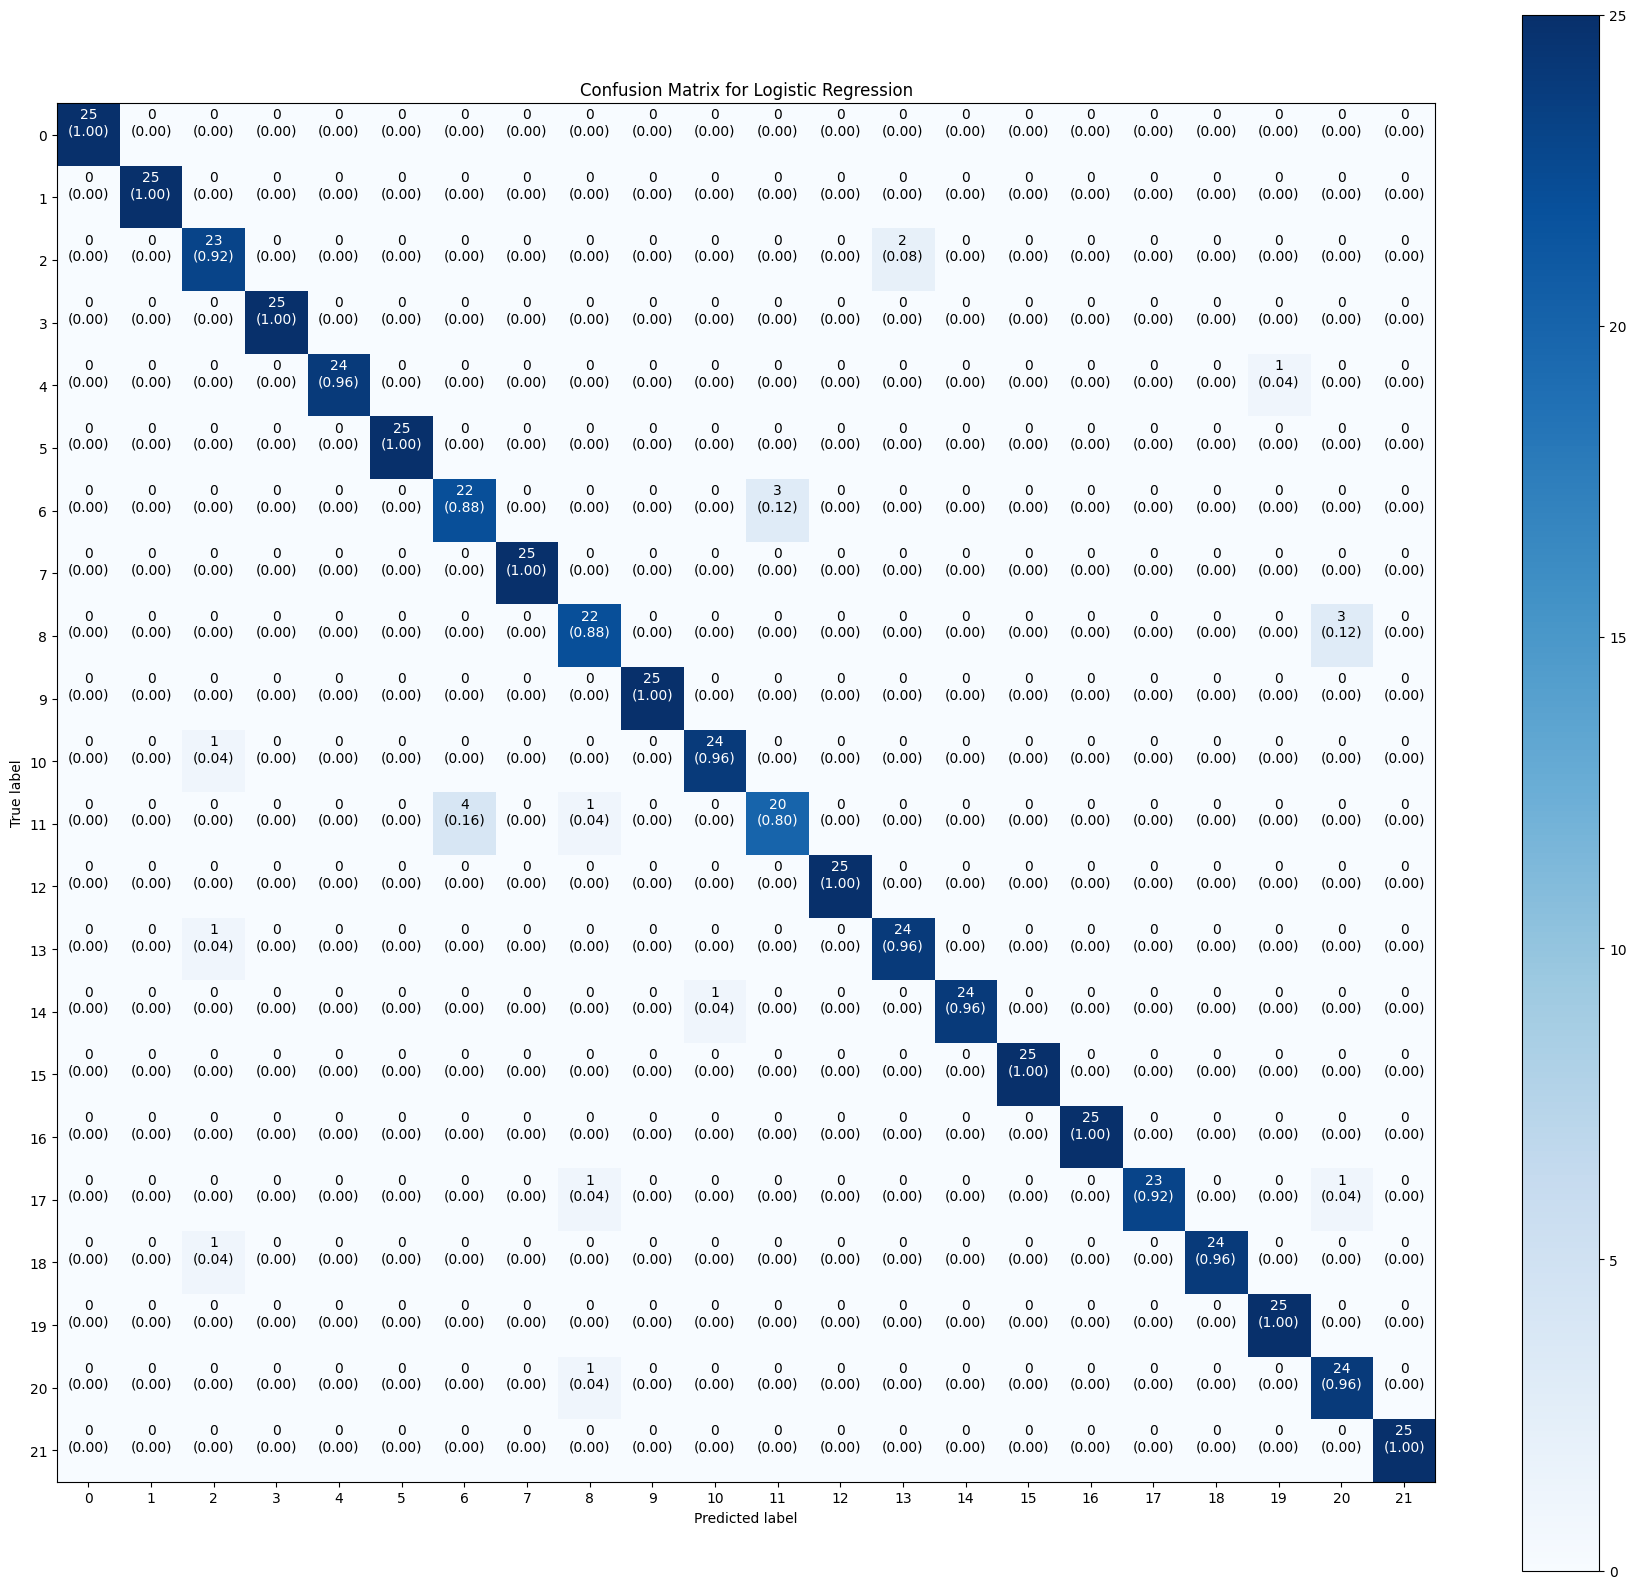

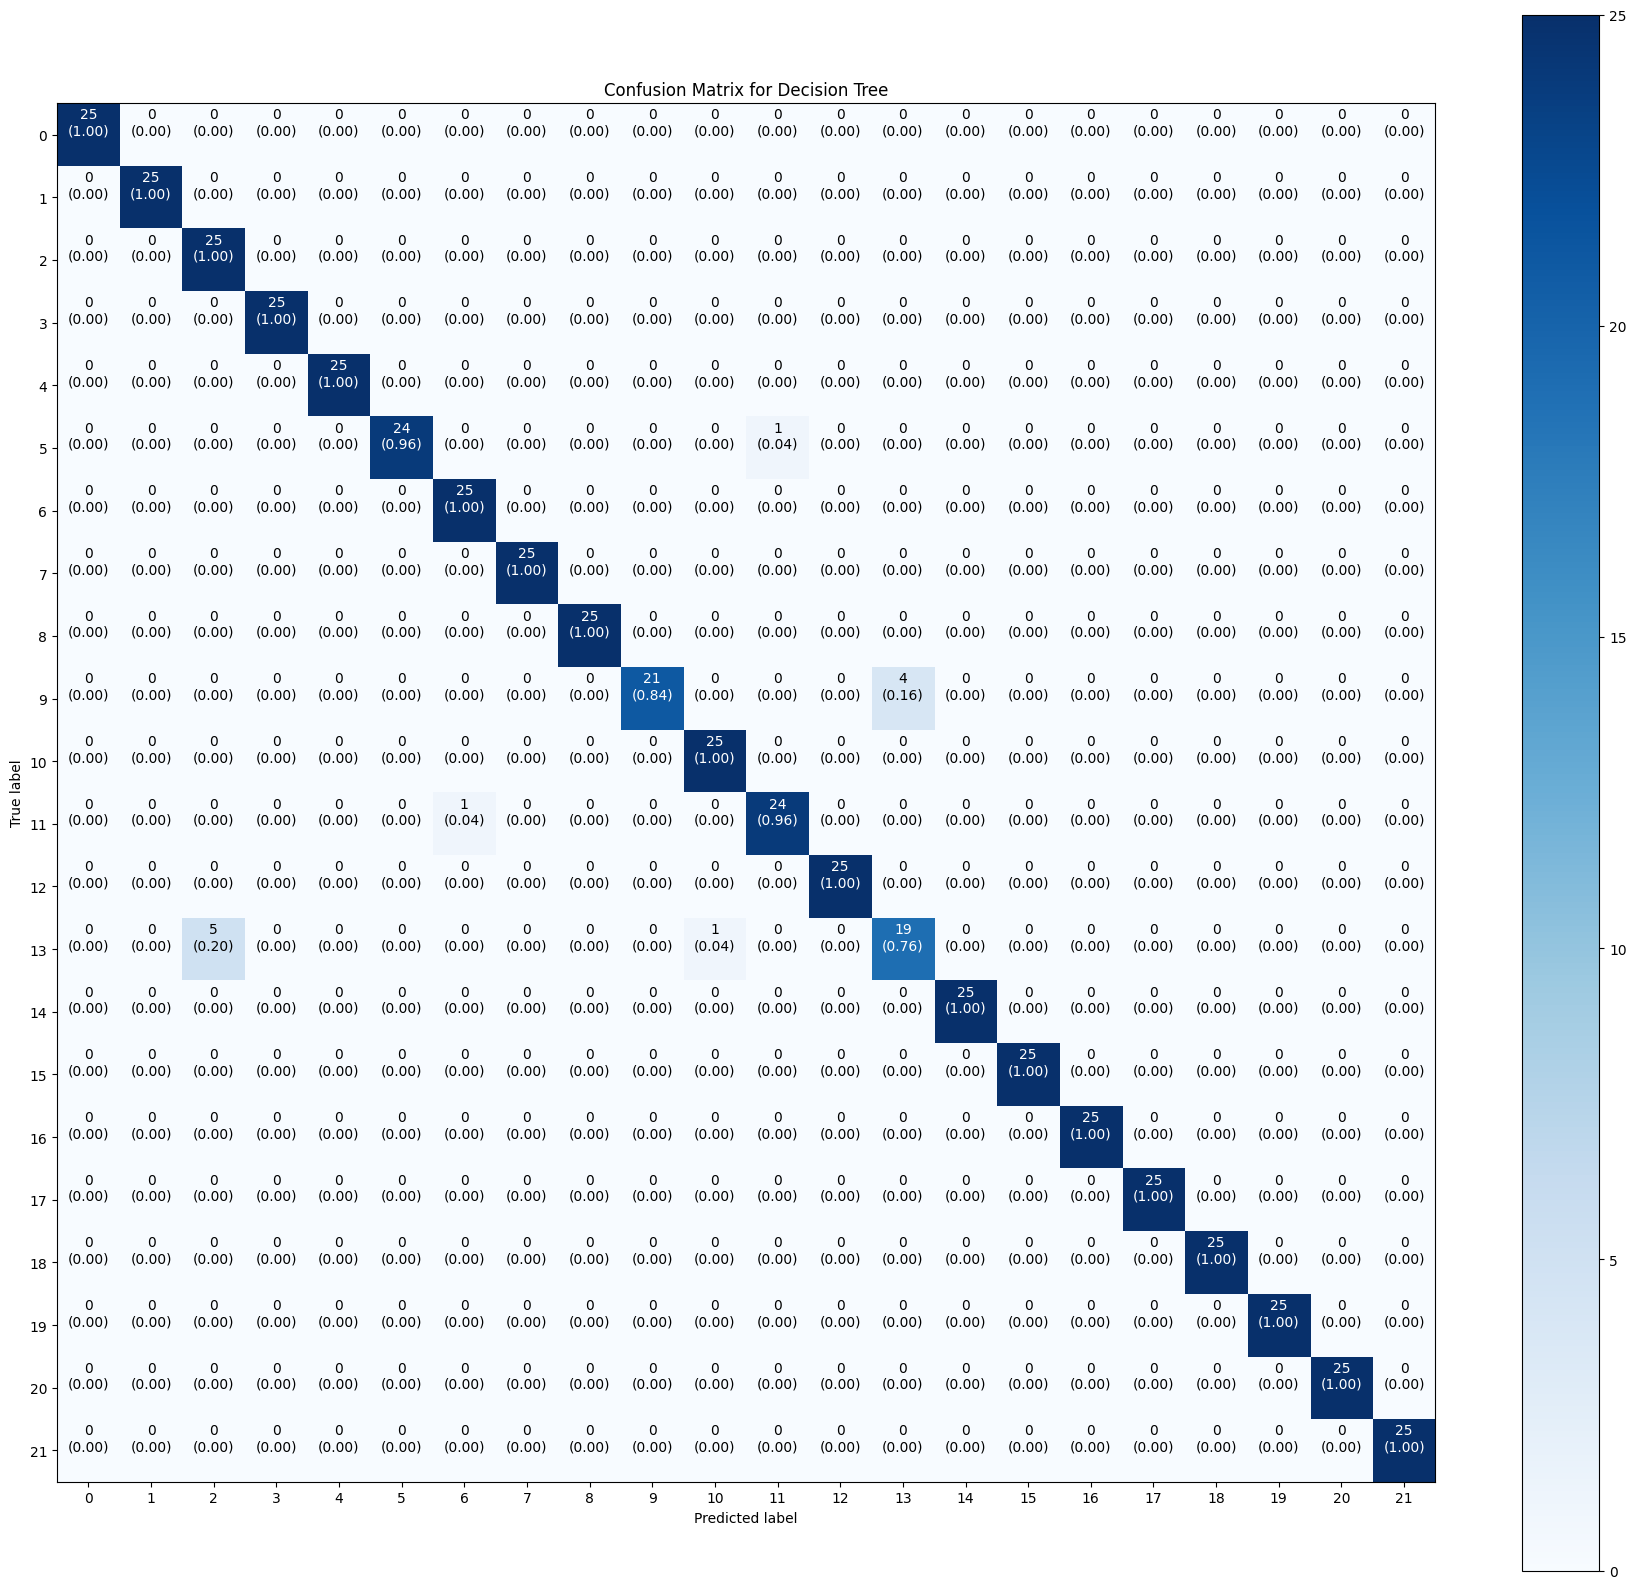

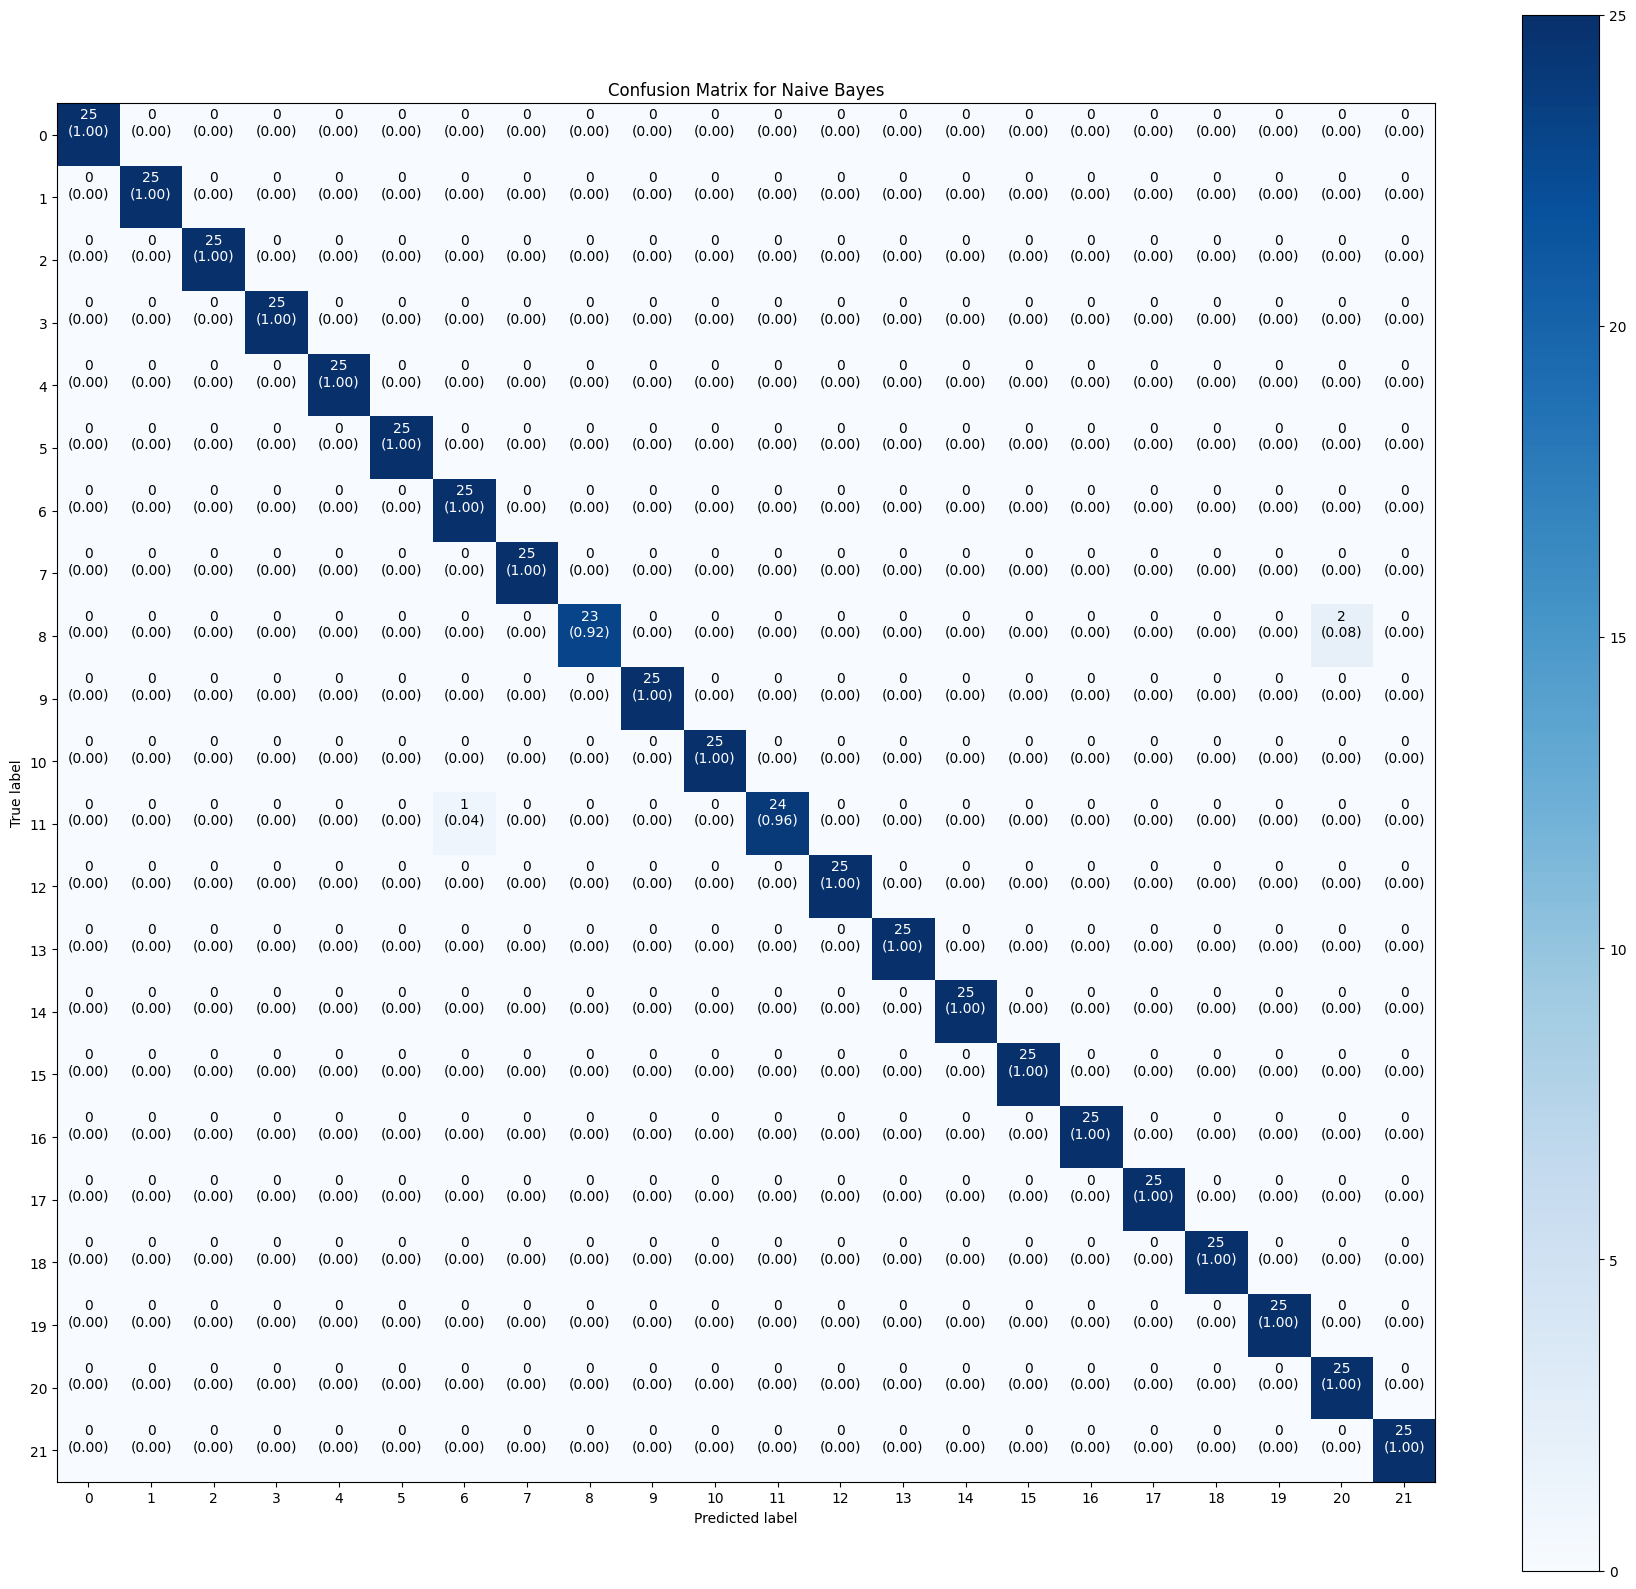

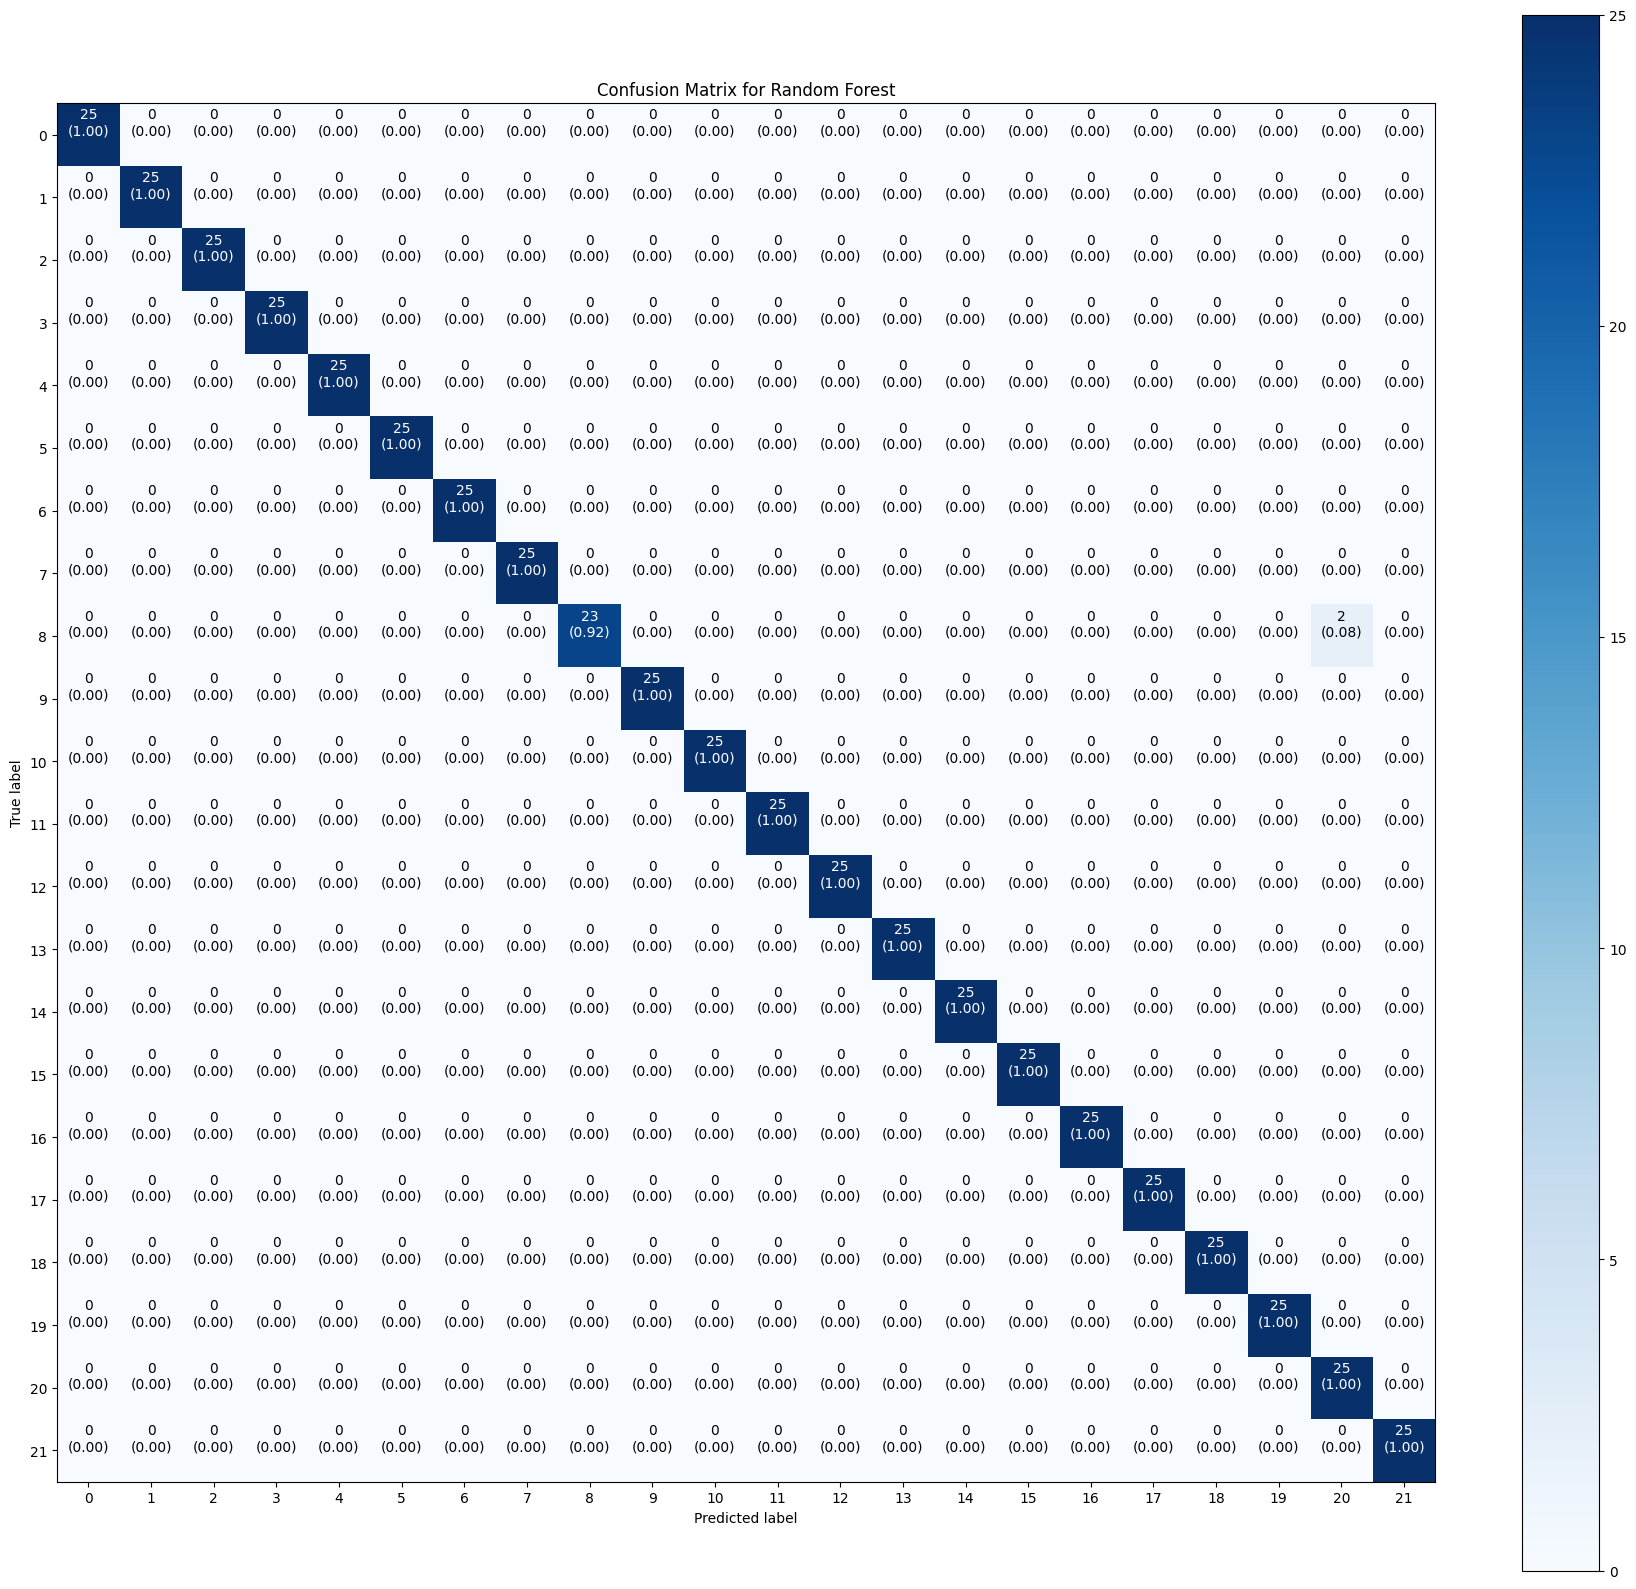

In [72]:
plot_confusion_matrix(y_test, y_pred, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_2, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_3, "Naive Bayes")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

In [48]:
import joblib 

In [49]:
file_name = 'crop_app'

In [50]:
joblib.dump(model_2,'crop_app')

['crop_app']

In [51]:
app = joblib.load('crop_app')

In [52]:
arr = [[90,42,43,20.879744,82.002744,6.502985,202.935536]]
acc = app.predict(arr)

C:\python37\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [53]:
acc

array(['rice'], dtype=object)

In [54]:
import pickle

In [55]:
Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model_2, file)

In [56]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_Model = pickle.load(file)

Pickled_Model

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=2)

# LIMITATIONS

## LOGISTIC REHRESSION

#### Logistic regression assumes a linear relationship between the input characteristics and the log-oddness of the outcome, which may not be true for complex datasets.

## DECISION TREE

#### They will overfit when they get deep and caputer the noise in dataset.

## NAIVE BAYES

#### It assumes that the features are independent, which is not really true in real-world data, it will leading us to the suboptimal performance.

## RANDOM FOREST

 #### This model are complex and have difficulty in doing interpretation as compared to single decision trees, it makes challenging to understand the decision process.

# IMPROVEMENTS

## FEATURE ENGINEERING

#### Exploring and creating  new features that captures the pattern in the dataset.

## Model Tuning:

#### By implementing the "REGULARIZATION" methods just to avoid overfitting in models like logistic regression and decission trees.

## Cross-Validation:

#### By using "K_FOLD" cross validation to better asses the model performance and by reducing the risk of overfitting by averaging over multiple training and validation splits.